In [1]:
import os
import pandas as pd
os.getcwd()

'C:\\Users\\yogesh\\OneDrive\\Desktop\\python'

In [2]:
Data=pd.read_excel('DATUM EXCEL.xlsx')

In [3]:
Data=Data.drop(columns=['Materials'])
Data.shape

(130, 32)

In [4]:
Data=Data.drop_duplicates()
Data.shape

(130, 32)

In [5]:
Data['Condition'].value_counts()

STA         55
annealed    22
Heating     16
ST          12
pure        10
Pure         9
aged         4
annelaed     2
Name: Condition, dtype: int64

In [6]:
import numpy as np
Data['Condition']=np.where(Data['Condition']=='annelaed','annealed',Data['Condition'])
Data['Condition']=np.where(Data['Condition']=='Pure','pure',Data['Condition'])

In [7]:
Data['Condition'].value_counts()

STA         55
annealed    24
pure        19
Heating     16
ST          12
aged         4
Name: Condition, dtype: int64

In [8]:
Data=pd.get_dummies(Data)
Data.shape

(130, 37)

In [9]:
x=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y=Data['Elastic Modulus (GPA)']

In [10]:
print(x.shape)
print(y.shape)

(130, 33)
(130,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x1train,x1test,y1train,y1test=train_test_split(x,y,test_size=0.2)

In [12]:
print(x1train.shape)
print(y1train.shape)
print(x1test.shape)
print(y1test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [13]:
x1train=x1train.reset_index(drop=True)
y1train=y1train.reset_index(drop=True)
x1test=x1test.reset_index(drop=True)

In [14]:
x1train=x1train.iloc[:,:].values
x1test=x1test.iloc[:,:].values
y1train=y1train.values.flatten()

In [15]:
y1train=y1train.reshape(-1,1)

In [16]:
from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x1train= StdS_X.fit_transform(x1train)
y1train= StdS_y.fit_transform(y1train)
x1test=StdS_X.fit_transform(x1test)

In [17]:
#GridsearchCV for hyperparameter tuning!

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
grid ={'n_estimators':[200,300,400,500],'max_features':['sqrt','log2'],'max_depth':[3,4,5,6,7,8]}
Randomfr1 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
Randomfr1.fit(x1train, y1train)

D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500]})

In [18]:
#getting best parameters!

A=Randomfr1.best_params_

In [19]:
#modelling the train datasets using the best parameters!

rfr1 = RandomForestRegressor(n_estimators = A['n_estimators'], max_features = A['max_features'], max_depth = A['max_depth'],random_state=100).fit(x1train, y1train)

<ipython-input-19-e161fec39bf8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr1 = RandomForestRegressor(n_estimators = A['n_estimators'], max_features = A['max_features'], max_depth = A['max_depth'],random_state=100).fit(x1train, y1train)


In [20]:
pred_y1=rfr1.predict(x1test)

In [21]:
pred_y1 =StdS_y.inverse_transform(pred_y1)

In [22]:
data1=list(zip(y1test,pred_y1))
comparison1=pd.DataFrame(data1,columns=['Actual','Predicted'])
comparison1.head()

Actual   Predicted
0   104.1  104.289316
1   104.1  104.347342
2   120.0  107.051901
3   107.0  103.795775
4   115.0  106.924735

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1=sqrt(mean_squared_error(y1test,pred_y1))
rmse1

9.573792116363759

<function matplotlib.pyplot.show(close=None, block=None)>

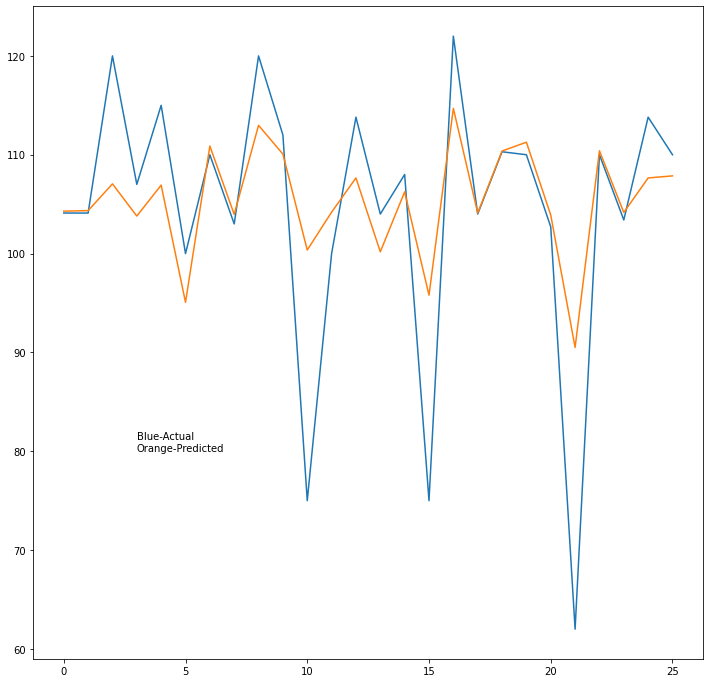

In [24]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
Graph1=comparison1[['Actual','Predicted']]
plt.text(3,80,'Blue-Actual \nOrange-Predicted')
plt.plot(Graph1)
plt.show

In [25]:
x1=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y1=Data['Ultimate Tensile(MPA)']

In [26]:
print(x1.shape)
print(y1.shape)

(130, 33)
(130,)


In [27]:
x2train,x2test,y2train,y2test=train_test_split(x1,y1,test_size=0.2)

In [28]:
print(x2train.shape)
print(y2train.shape)
print(x2test.shape)
print(y2test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [29]:
x2train=x2train.reset_index(drop=True)
y2train=y2train.reset_index(drop=True)
x2test=x2test.reset_index(drop=True)

In [30]:
x2train=x2train.iloc[:,:].values
x2test=x2test.iloc[:,:].values
y2train=y2train.values.flatten()

In [31]:
y2train=y2train.reshape(-1,1)

In [32]:
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x2train= StdS_X.fit_transform(x2train)
y2train= StdS_y.fit_transform(y2train)
x2test=StdS_X.fit_transform(x2test)

In [33]:
grid ={'n_estimators':[200,300,400,500],'max_features':['sqrt','log2'],'max_depth':[3,4,5,6,7,8]}
Randomfr2 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
Randomfr2.fit(x2train, y2train)

D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500]})

In [34]:
B=Randomfr2.best_params_

In [35]:
rfr2 = RandomForestRegressor(n_estimators = B['n_estimators'], max_features = B['max_features'], max_depth = B['max_depth'],random_state=100).fit(x2train, y2train)

<ipython-input-35-f3a80a2e33f3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr2 = RandomForestRegressor(n_estimators = B['n_estimators'], max_features = B['max_features'], max_depth = B['max_depth'],random_state=100).fit(x2train, y2train)


In [36]:
pred_y2=rfr2.predict(x2test)

In [37]:
pred_y2 =StdS_y.inverse_transform(pred_y2)

In [38]:
data2=list(zip(y2test,pred_y2))
comparison2=pd.DataFrame(data2,columns=['Actual','Predicted'])
comparison2.head()

Actual    Predicted
0     620   570.591858
1     131   220.742160
2     861   859.628795
3    1000   924.661367
4    1150  1282.517024

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse2=sqrt(mean_squared_error(y2test,pred_y2))
rmse2

191.5458295153779

<function matplotlib.pyplot.show(close=None, block=None)>

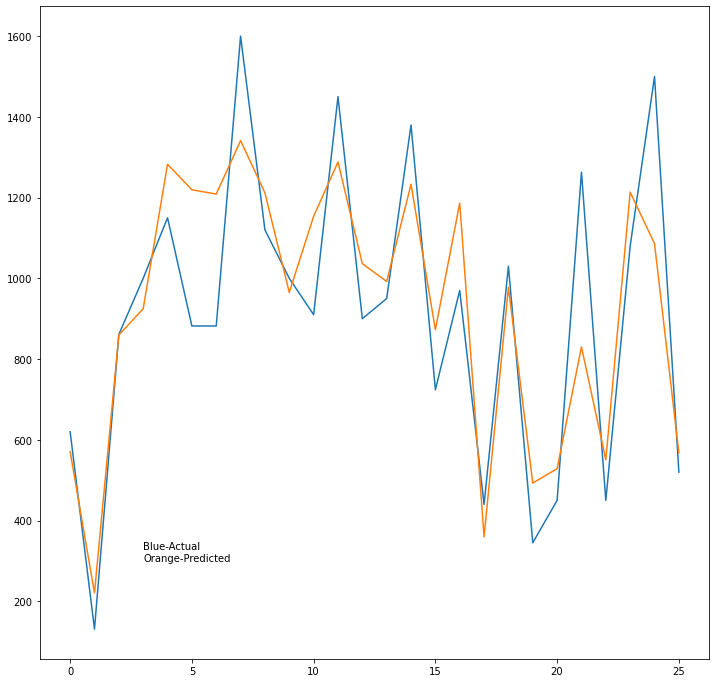

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
Graph2=comparison2[['Actual','Predicted']]
plt.text(3,300,'Blue-Actual \nOrange-Predicted')
plt.plot(Graph2)
plt.show

In [93]:
x2=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y2=Data['Yield strength(MPA) (Max)']

In [94]:
print(x2.shape)
print(y2.shape)

(130, 33)
(130,)


In [95]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x3train,x3test,y3train,y3test=train_test_split(x2,y2,test_size=0.2)

In [96]:
print(x3train.shape)
print(y3train.shape)
print(x3test.shape)
print(y3test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [97]:
x3train=x3train.reset_index(drop=True)
y3train=y3train.reset_index(drop=True)
x3test=x3test.reset_index(drop=True)

In [98]:
x3train=x3train.iloc[:,:].values
x3test=x3test.iloc[:,:].values
y3train=y3train.values.flatten()

In [99]:
y3train=y3train.reshape(-1,1)

In [100]:
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x3train= StdS_X.fit_transform(x3train)
y3train= StdS_y.fit_transform(y3train)
x3test=StdS_X.fit_transform(x3test)

In [101]:
grid ={'n_estimators':[200,300,400,500],'max_features':['sqrt','log2'],'max_depth':[3,4,5,6,7,8]}
Randomfr3 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
Randomfr3.fit(x3train, y3train)

D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500]})

In [102]:
C=Randomfr3.best_params_

In [103]:
rfr3 = RandomForestRegressor(n_estimators = C['n_estimators'], max_features = C['max_features'], max_depth = C['max_depth'],random_state=100).fit(x1train, y1train)

<ipython-input-103-c1095524e451>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr3 = RandomForestRegressor(n_estimators = C['n_estimators'], max_features = C['max_features'], max_depth = C['max_depth'],random_state=100).fit(x1train, y1train)


In [104]:
pred_y3=rfr3.predict(x1test)

In [105]:
pred_y3 =StdS_y.inverse_transform(pred_y3)

In [106]:
data3=list(zip(y3test,pred_y3))
comparison3=pd.DataFrame(data3,columns=['Actual','Predicted'])
comparison3.head()

Actual    Predicted
0     790   801.012224
1    1410   806.545932
2     760  1057.672341
3     980   806.996710
4    1070   888.472654

In [107]:
rmse3=sqrt(mean_squared_error(y3test,pred_y3))
rmse3

354.3136751586288

<function matplotlib.pyplot.show(close=None, block=None)>

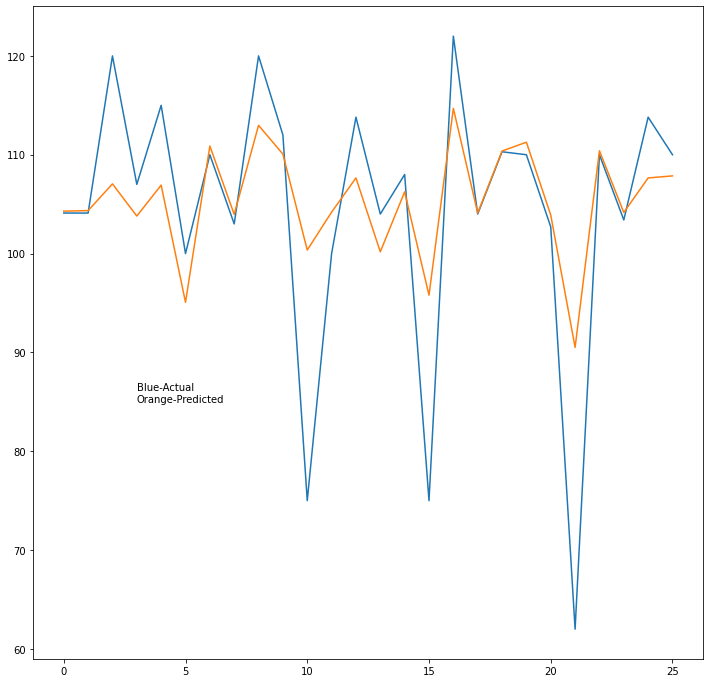

In [108]:
plt.figure(figsize=(12,12))
Graph3=comparison1[['Actual','Predicted']]
plt.text(3,85,'Blue-Actual \nOrange-Predicted')
plt.plot(Graph3)
plt.show

In [57]:
x3=Data.drop(columns=['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'])
y3=Data['Elongation(%)']

In [58]:
print(x3.shape)
print(y3.shape)

(130, 33)
(130,)


In [59]:
x4train,x4test,y4train,y4test=train_test_split(x3,y3,test_size=0.2)

In [60]:
print(x4train.shape)
print(y4train.shape)
print(x4test.shape)
print(y4test.shape)

(104, 33)
(104,)
(26, 33)
(26,)


In [61]:
x4train=x4train.reset_index(drop=True)
y4train=y4train.reset_index(drop=True)
x4test=x4test.reset_index(drop=True)

In [62]:
x4train=x4train.iloc[:,:].values
x4test=x4test.iloc[:,:].values
y4train=y4train.values.flatten()

In [63]:
y4train=y4train.reshape(-1,1)

In [64]:
StdS_X = StandardScaler()
StdS_y = StandardScaler()
x4train= StdS_X.fit_transform(x4train)
y4rain= StdS_y.fit_transform(y4train)
x4test=StdS_X.fit_transform(x4test)

In [65]:
grid ={'n_estimators':[200,300,400,500],'max_features':['sqrt','log2'],'max_depth':[3,4,5,6,7,8]}
Randomfr4 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
Randomfr4.fit(x4train, y4train)

D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda setup\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500]})

In [66]:
D=Randomfr4.best_params_

In [67]:
rfr4 = RandomForestRegressor(n_estimators = D['n_estimators'], max_features = D['max_features'], max_depth = D['max_depth'],random_state=100).fit(x1train, y1train)

<ipython-input-67-c7125759162f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr4 = RandomForestRegressor(n_estimators = D['n_estimators'], max_features = D['max_features'], max_depth = D['max_depth'],random_state=100).fit(x1train, y1train)


In [68]:
pred_y4=rfr4.predict(x1test)

In [69]:
pred_y4 =StdS_y.inverse_transform(pred_y4)

In [70]:
data4=list(zip(y4test,pred_y4))
comparison4=pd.DataFrame(data4,columns=['Actual','Predicted'])
comparison4.head()

Actual  Predicted
0     8.0  14.569276
1    20.0  14.728598
2    12.0  18.911476
3    15.0  14.184127
4    28.0  16.990617

In [71]:
rmse4=sqrt(mean_squared_error(y4test,pred_y4))
rmse4

7.574240781716724

<function matplotlib.pyplot.show(close=None, block=None)>

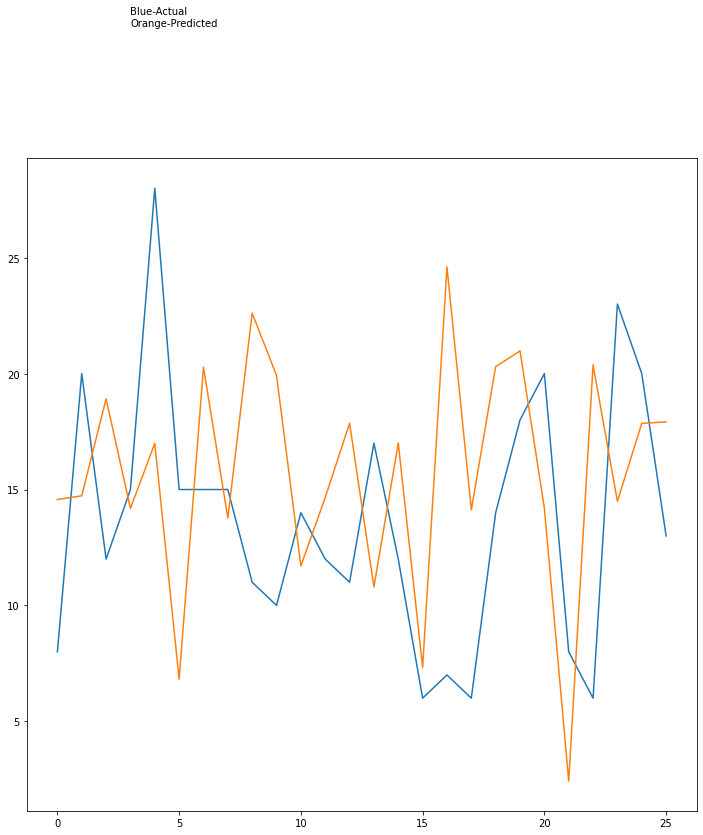

In [72]:
plt.figure(figsize=(12,12))
Graph4=comparison4[['Actual','Predicted']]
plt.text(3,35,'Blue-Actual \nOrange-Predicted')
plt.plot(Graph4)
plt.show

In [109]:
Columns={'Parameters':['Elastic Modulus (GPA)','Ultimate Tensile(MPA)','Yield strength(MPA) (Max)','Elongation(%)'],
        'RFRerror':[rmse1,rmse2,rmse3,rmse4]}
Error=pd.DataFrame(Columns)
Error.to_excel('errors2.xlsx')

In [110]:
Error

Parameters    RFRerror
0      Elastic Modulus (GPA)    9.573792
1      Ultimate Tensile(MPA)  191.545830
2  Yield strength(MPA) (Max)  354.313675
3              Elongation(%)    7.574241